In [1]:
import re
from nltk.corpus import wordnet
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import re
from nltk.corpus import state_union, stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np

class Attr:
    def __init__(self, property):
        self.property = property
        self.pos = 0
        self.neg = 0

attributes = [Attr('food'),Attr('taste'),Attr('price'),Attr('ambiance'),Attr('service'),Attr('staff'),Attr('clean'),Attr('time')]
pw = 0
nw = 0

#------------------------------------------------private methods-----------------------------------------------------------------    
#removing punctuation    
def RemovePunctuation(reviews):
    for index, row in reviews.iterrows():
        review = row['Review']
        review = re.sub("[\.!{2,}]", ' ', review)
        review = re.sub("[^a-zA-Z' ]+", '', review).lower()
        reviews.at[index, 'Review'] = review

#removal of words not in dictionary
def RemovingNonEnglishWords(reviews):
    for index, row in reviews.iterrows():
        review = row['Review']
        review = ' '.join([w for w in str(review).split() if wordnet.synsets(w)])
        reviews.at[index, 'Review'] = review

#get a list of stopWords    
def GetStopWords():
    oldStopWords = stopwords.words('english')
    exceptions = ['no', 'nor', 'not','don', "don't", 't', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    stopWords = [word for word in oldStopWords if word not in exceptions]
    return stopWords
    
#removing stop words
def RemoveStopWords(reviews):
    stopWords = GetStopWords()
    for index, row in reviews.iterrows():
        review = row['Review']
        wordList = review.split() 
        filteredWords = [word for word in wordList if word not in stopWords]
        review = ' '.join(filteredWords)
        reviews.at[index, 'Review'] = review
#------------------------------------------------private methods end-----------------------------------------------------------------    

#print reviews
def PrintReviews(reviews):
    print(reviews)
    
#finding out the unique words
def UniqueWords(reviews):
    uniqueWords = list(reviews['Review'].str.split(' ', expand=True).stack().unique())
    print(len(uniqueWords))

#data cleansing
def CleanData(reviews):
    RemovePunctuation(reviews)
    RemovingNonEnglishWords(reviews)
    RemoveStopWords(reviews)
    
#cleaning an individual review
def CleanTestSentence(review):
    review = re.sub("[\.!{2,}]", ' ', review)
    review = re.sub("[^a-zA-Z' ]+", '', review).lower()
    stopWords = GetStopWords()
    wordList = review.split() 
    filteredWords = [word for word in wordList if word not in stopWords]
    review = ' '.join(filteredWords)
    wordsTokens = review.split()
    stemmedSentence = []
    porter = PorterStemmer()
    for word in wordsTokens:
        stemmedSentence.append(porter.stem(word))
        stemmedSentence.append(" ")
    review = "".join(stemmedSentence)
    return review

#Part of speech tagging
def part_of_speech_tagging(sentence):
    try:
        tokenized = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(tokenized)
        #print(tagged)
        phraseReg = r"""Phrase: {<RB.?>+<VB.?><NN.?> | <RB.?>*<VB.?>*<NNP>+<NN>? | <JJ.?>*<NN.?>+ | <JJ>*<VB>*<NN.?>}"""
        phraseParser = nltk.RegexpParser(phraseReg)
        #print(phraseParser)
        phrased = phraseParser.parse(tagged)
        #print(phrased)
        sentiment_analysis(phrased)
    except Exception as exp:
        print(str(exp))
        
def search_target(li):
    for i in li:
        if i[0] == 'food':
            return i[0]
        elif i[0] == 'taste':
            return i[0]
        elif i[0] == 'price':
            return i[0]
        elif i[0] == 'ambiance':
            return i[0]
        elif i[0] == 'service':
            return i[0]
        elif i[0] == 'staff':
            return i[0]
        elif i[0] == 'clean':
            return i[0]
        elif i[0] == 'time':
            return i[0]
        
from textblob import TextBlob
def phrasePolarity(phrase):
    global pw
    global nw
    polarity = TextBlob(phrase).sentiment.polarity
    if polarity >=0:
        pw = pw + 1
    else:
        nw = nw + 1
        
def sentiment_analysis(phrase):
    global pw
    global nw
    for i in phrase:
        pw = 0
        nw = 0
        target = search_target(i);
        for j in i: 
            if(j[1]== 'RB' or j[1]== 'RBR' or j[1]== 'RBS' or j[1]== 'JJ' or j[1]== 'JJR' or j[1]== 'JJS' or j[1]== 'VB' or j[1]== 'VBD' or j[1]== 'VBG' or j[1]== 'VBN' or j[1]== 'VBP' or j[1]== 'VBZ'):
                phrasePolarity(j[0])
        for k in attributes:
            if k.property == target:
                if pw > nw:
                    k.pos = k.pos + 1
                elif pw < nw:
                    k.neg = k.neg + 1
                    
def PlotGraph():
    plt.rcdefaults()
    fig, ax = plt.subplots()
    
    # Example data
    labelsX = ('Food +', 'Food -', 'Taste +', 'Taste -', 'Price +', 'Price -', 'Ambiance +', 'Ambiance -', 'Service +', 'Service -', 'Staff +', 'Staff -', 'Clean +', 'Clean -', 'Time +', 'Time -' )
    y_pos = np.arange(len(labelsX))
    height = [attributes[0].pos, attributes[0].neg, attributes[1].pos, attributes[1].neg, attributes[2].pos, attributes[2].neg, attributes[3].pos, attributes[3].neg, attributes[4].pos, attributes[4].neg, attributes[5].pos, attributes[5].neg, attributes[6].pos, attributes[6].neg, attributes[7].pos, attributes[7].neg]
    # plt.barh(y_pos, height)


    plot = ax.barh(y_pos, height)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labelsX)
    ax.invert_yaxis()
    ax.set_xlabel('Number of reviews')
    ax.set_title('Feature Extraction')
    plot[0].set_color('g')
    plot[1].set_color('r') 
    plot[2].set_color('g')
    plot[3].set_color('r')
    plot[4].set_color('g')
    plot[5].set_color('r')
    plot[6].set_color('g')
    plot[7].set_color('r')
    plot[8].set_color('g')
    plot[9].set_color('r')
    plot[10].set_color('g')
    plot[11].set_color('r')
    plot[12].set_color('g')
    plot[13].set_color('r')
    plot[14].set_color('g')
    plot[15].set_color('r')
    plt.show()
    
def InitializeAttributes():
    for t in attributes:
        t.pos = 0
        t.neg = 0
        
def RunProgram(reviews):
    InitializeAttributes()
    for index, row in reviews.iterrows():
        review = row['Review']
        if (review == ''):
            continue
        part_of_speech_tagging(review)
    PlotGraph()

In [2]:
import pandas as pd
reviews = pd.read_csv('C:/Users/Hamza/Desktop/FeatureExtraction-Food/RestaurantReviews.csv')
#print(reviews) 

In [3]:
CleanData(reviews)
#PrintReviews(reviews)

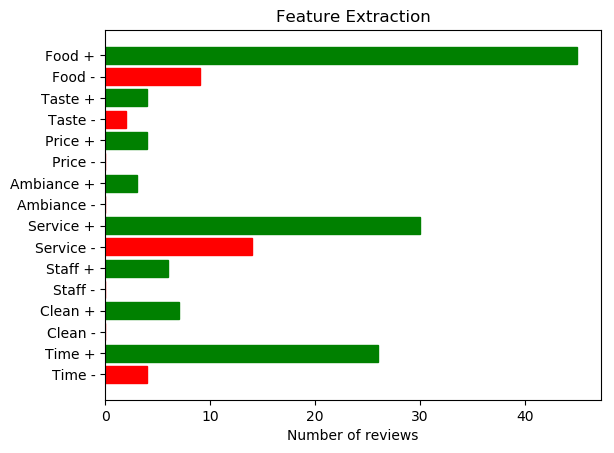

In [4]:
RunProgram(reviews)